<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>6. Analyse des commentaires avec sentence tranformer </h1></center>
<hr style="border-width:2px;border-color:#75DFC1">

In [ ]:
#importation des librairies nécessaires 
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [6]:
df = pd.read_pickle("C:/Users/annab/Desktop/Datascientest/Projet/tmp/df2.pkl")

In [7]:
# nettoyage de mots similaires
import re
def replace_simi(text):
    text = re.sub(r"délais", 'délai', text)
    text = re.sub(r"livraisons", 'livraison', text)
    text = re.sub(r"longs", 'long', text)
    text = re.sub(r"delai", 'délai', text)
    text = re.sub(r"contacte", 'contacté', text)
    return text
df['Commentaire']=df['Commentaire'].astype(str)
df['Commentaire'] = df['Commentaire'].apply(replace_simi)

### Bag of words

In [ ]:
vectorizer = CountVectorizer(ngram_range=(3,3))
cv= vectorizer.fit_transform(df.Commentaire)
Y = vectorizer.get_feature_names()
dfb = pd.DataFrame(Y,columns = ['Groupe_de_mots'])
dfb['frequence']=cv.toarray().sum(axis=0)
dfb.sort_values(by = 'frequence', ascending = False).head(10)

In [11]:
df1=df.loc[df['star']==1]
df2=df.loc[df['star']==2]
df3=df.loc[df['star']==3]
df4=df.loc[df['star']==4]
df5=df.loc[df['star']==5]

In [ ]:
# star 1
vectorizer = CountVectorizer(ngram_range=(3,3))
cv1= vectorizer.fit_transform(df1.Commentaire)
Y1 = vectorizer.get_feature_names()
df1b = pd.DataFrame(Y1,columns = ['Groupe_de_mots'])
df1b['frequence']=cv1.toarray().sum(axis=0)
print('1 étoile')
df1b.sort_values(by = 'frequence', ascending = False).head(10)

In [8]:
# star 2
vectorizer = CountVectorizer(ngram_range=(3,3))
cv2= vectorizer.fit_transform(df2.Commentaire)
Y2 = vectorizer.get_feature_names()
df2b = pd.DataFrame(Y2,columns = ['Groupe_de_mots'])
df2b['frequence']=cv2.toarray().sum(axis=0)
df2b.sort_values(by = 'frequence', ascending = False).head(10)

,Groupe_de_mots,frequence
7261,délai livraison long,22
5186,contacté service client,9
21006,site vente privée,7
12330,mail service client,6
11577,livraison point relais,6
732,appel service client,5
1245,articles mauvaise qualité,5
601,années commande site,5
20463,service client répond,5
20462,service client réactif,5


In [21]:
# star 3
vectorizer = CountVectorizer(ngram_range=(3,3))
cv3= vectorizer.fit_transform(df3.Commentaire)
Y3 = vectorizer.get_feature_names()
df3b = pd.DataFrame(Y3,columns = ['Groupe_de_mots'])
df3b['frequence']=cv3.toarray().sum(axis=0)
df3b.sort_values(by = 'frequence', ascending = False).head(10)

,Groupe_de_mots,frequence
5144,délai livraison long,44
8729,manque articles commande,5
6344,frais livraison élevés,5
7984,livraison point relais,5
12346,rapport qualité prix,5
13365,reçu totalité commande,4
491,appelé service client,4
8723,manque article commande,4
3678,contactér service client,4
4678,dois payer frais,3


In [10]:
# star 4
vectorizer = CountVectorizer(ngram_range=(3,3))
cv4= vectorizer.fit_transform(df4.Commentaire)
Y4 = vectorizer.get_feature_names()
df4b = pd.DataFrame(Y4,columns = ['Groupe_de_mots'])
df4b['frequence']=cv4.toarray().sum(axis=0)
df4b.sort_values(by = 'frequence', ascending = False).head(10)

,Groupe_de_mots,frequence
6048,délai livraison long,80
15256,rapport qualité prix,30
6061,délai livraison respecté,14
914,articles bonne qualité,11
9622,livraison rapide produit,10
17239,service client top,9
9547,livraison point relais,9
13907,produit conforme description,9
13886,produit bonne qualité,9
17228,service client réactif,8


In [12]:
# star 5
vectorizer = CountVectorizer(ngram_range=(3,3))
cv5= vectorizer.fit_transform(df5.Commentaire)
Y5 = vectorizer.get_feature_names()
df5b = pd.DataFrame(Y5,columns = ['Groupe_de_mots'])
df5b['frequence']=cv5.toarray().sum(axis=0)
df5b.sort_values(by = 'frequence', ascending = False).head(10)

,Groupe_de_mots,frequence
17188,rapport qualité prix,72
10964,livraison rapide produit,49
7154,délai livraison long,46
7170,délai livraison respecté,35
15490,produits bonne qualité,27
15214,produit conforme description,24
10967,livraison rapide prévue,24
16941,rapide produit conforme,24
11141,livraison ultra rapide,21
1095,article conforme description,20


### Sentence transformer

In [17]:
model = SentenceTransformer('distilbert-multilingual-nli-stsb-quora-ranking')

In [34]:
# encodage du dataframe - df=df.assign(embeddings=df['Commentaire'].apply(lambda x: model.encode(x)))
# sauvegarde du dataframe - df.to_pickle("C:/Users/annab/Desktop/Datascientest/Projet/tmp/df_transformer.pkl")
# import du dataframe sauvegardé
df = pd.read_pickle("C:/Users/annab/Desktop/Datascientest/Projet/tmp/df_transformer.pkl")

In [35]:
df.head(5)

,Commentaire,star,reponse,embeddings
0,bonjour ca ans membre showrooprive jamais souc...,1,NaN,"[0.054147113, 0.10390524, 0.39564028, 0.086564..."
1,vente lacoste article manquant photo prise art...,1,NaN,"[0.13039258, 0.118610464, 0.30746627, 0.404702..."
2,vente lacoste honteuse article erroné article ...,1,NaN,"[0.12667209, 0.24239892, 0.18738666, 0.2686706..."
3,commandé mules marque moosefield déçue produit...,2,"Bonjour , Je suis sincèrement navré d'apprendr...","[0.352759, 0.18155934, 0.028760739, 0.27704835..."
4,commande téléphone etat livraison vieux téléph...,1,"Bonjour Julie , Je suis sincèrement désolé de ...","[0.25076002, 0.19516167, 0.40434667, 0.261749,..."


### Commentaires similaires

In [37]:
def comments_similarity(n):
    df2=df.copy()
    import scipy
    n_vector=model.encode(n)
    s=df2['embeddings'].apply(lambda x: round((1 - scipy.spatial.distance.cosine(x, n_vector))*100,2))
    df2=df2.assign(similarity=s)
    return(df2[['Commentaire','star','similarity']].sort_values('similarity',ascending=False).head(11))

In [38]:
comments_similarity(df.Commentaire[3])

,Commentaire,star,similarity
3,commandé mules marque moosefield déçue produit...,2,100.00
7829,livraison rapide jolies mules bonne qualité se...,5,94.96
10465,mules reçues taille lieu commandées seule boît...,2,94.74
924,commande bottes cuir effectuée modèle mules pa...,1,94.18
8039,commande birkenstock attendais chaussures marq...,3,94.12
14599,commandé sandales marque birkenstock reçu sand...,3,93.64
7636,contente commande birkenstock livraison reçue ...,5,93.42
17339,vente the kooples paire bottine cuir chèvre éc...,1,93.40
1196,effectué commande paire vans old skool orange ...,1,93.04
14426,délai important livraison doute due confinemen...,4,92.97


In [39]:
comments_similarity(df.Commentaire[3]).values

array([['commandé mules marque moosefield déçue produit étiquette collée mules tâche produit moyen',
        2, 100.0],
       ['livraison rapide jolies mules bonne qualité service client utilisé souvent parfait rare appelé sagissait dun problème livraison relais dû transporteur colis jamais arrivé perdu vite remboursé site points jadore continuez dautres pourraient prendre exemple',
        5, 94.96],
       ['mules reçues taille lieu commandées seule boîte difficulté joindre service clients',
        2, 94.74],
       ['commande bottes cuir effectuée modèle mules pailletées reçues mails réclamation envoyés téléconseillers ligne geste action sympathique part showroom recommandent retour remboursement pratique période confinement covid attention site erreurs commandes arrivent fréquemment ventes privées veepee sûres',
        1, 94.18],
       ['commande birkenstock attendais chaussures marque marque papillio déçue commande cétait offrir',
        3, 94.12],
       ['commandé sandales 

In [33]:
comments_similarity(df.Commentaire[4])

,Commentaire,star,similarity
4,commande téléphone etat livraison vieux téléph...,1,100.00
17947,changent nom comprend arnaqué iphone reconditi...,1,96.87
441,acheté iphone showroomprive prestataire prs re...,1,96.37
1031,commandé iphone reconditionne fonctionne déçu ...,1,96.12
1791,achat iphone reçu batterie hs demande rembours...,1,96.06
17192,recommanderais site mois acheté iphone recondi...,1,95.83
4500,commande pochette trouve mettre téléphone plac...,4,95.83
14316,ferai commandes showroom privé déconseille com...,1,95.81
38,commande articles brosse electrique recharges ...,1,95.78
1884,acheté biais showroom privé iphone recondition...,1,95.78


In [34]:
comments_similarity(df.Commentaire[4]).values

array([['commande téléphone etat livraison vieux téléphone pourri batterie rayé partout inaudible super affaire euros poubelle showroomprivee passez chemin nuls contrôlent proposent vente',
        1, 100.0],
       ['changent nom comprend arnaqué iphone reconditionné livre défectueux batterie hs agit soidisant point contrôle demande retour faute jour jours échanges mail appels téléphoniques transporteur envoyé récupérer produit jours nouvelles retour remboursement mise demeure rembourser produit frais port indemnités dues titre loi hamon jours jours écoulés remboursement démarche auprès dgccrf affaire suivre jamais achat auprès escrocs',
        1, 96.87],
       ['acheté iphone showroomprive prestataire prs recyclage mobile noël fille cadeau overt téléphone semaine reconnaît plu carte sim réseau nécessaire déclaration marcher garantie société prs sav refuse prendre charge réparations disant jaurais réparer téléphone technicien auparavant changer bouton home doré argenté téléphone ser

In [35]:
comments_similarity(df.Commentaire[5])

,Commentaire,star,similarity
5,commande passée vente lacoste livraison date p...,1,100.00
14626,produits livrés commandés réclamation excusez ...,2,98.06
8713,marchandise reçue finalement contente celleci ...,5,98.05
18278,déçue déjà déçue auparavant qualité produits d...,1,97.95
13773,produits sympa livraisons délai long final reç...,4,97.86
13340,reçu produits commandées retard livraison déçu...,3,97.76
19337,rejoins déçus venteprivee achats retards livra...,1,97.75
2008,dernières commandes problèmes commande dun col...,1,97.61
17175,mois jattend remboursement commande livrée der...,1,97.55
16862,marque prête nom vendre articles présentés lux...,2,97.54


In [36]:
comments_similarity(df.Commentaire[5]).values

array([['commande passée vente lacoste livraison date prévue déjà semaines lachat produits manquants pro sérieux geste commercial remboursement promis articles manquants',
        1, 100.0],
       ['produits livrés commandés réclamation excusez demander attendre offre produit manquant livrer produit manquant bref délai rembourser montant produit manquant',
        2, 98.06],
       ['marchandise reçue finalement contente celleci lopératrice promis réduction prochaine commande retard occasionné cellecimerci davance',
        5, 98.05],
       ['déçue déjà déçue auparavant qualité produits demandée collections bas gamme nétaient fabriquées grandes marques uniquement type ventes dernièrement article jamais livré partir entrepôts tard lendemain décembre janvier lon mannonce appels colis perdu dépôt poste mois dattente commande naboutira jamais remboursement proposé jours incroyable recommanderais jamais type site',
        1, 97.95],
       ['produits sympa livraisons délai long final reç

In [42]:
dfsimi3=comments_similarity(df.Commentaire[3])
dfsimi4=comments_similarity(df.Commentaire[4])
dfsimi5=comments_similarity(df.Commentaire[5])
file_name = 'dfsimi.xlsx'
with pd.ExcelWriter(file_name) as writer:  
    dfsimi3.to_excel(writer, sheet_name='Commentaire_3')
    dfsimi4.to_excel(writer, sheet_name='Commentaire_4')
    dfsimi5.to_excel(writer, sheet_name='Commentaire_5')

### Groupe de mots les plus proches

In [15]:
vectorizer = CountVectorizer(max_features=1000,ngram_range=(3,3))
x = vectorizer.fit_transform(df.Commentaire)
voc=vectorizer.vocabulary_

In [18]:
# text similarity
textes_target=list(zip(model.encode(list(voc.keys())),list(voc.keys())))

def cosine_distance_wordembedding_method(s1, s2):
    import scipy
    cosine = scipy.spatial.distance.cosine(s1, s2)
    return round((1-cosine)*100,2)

def returnKsimilar(texte_source,k=10,textes_target=textes_target):
    texte_source=model.encode([texte_source])
    liste_Similar=[]
    
    for embedding, text in textes_target : 
        liste_Similar.append([cosine_distance_wordembedding_method(texte_source[0],embedding),text])
    return sorted(liste_Similar,key=lambda x : x[0],reverse=True)[:k]

In [26]:
# "contacté service client" frèquent dans star 1
returnKsimilar('contacté service client')

[[100.0, 'contacté service client'],
 [99.47, 'contactée service client'],
 [99.44, 'service client contacté'],
 [98.57, 'contacte service client'],
 [98.54, 'contacter service client'],
 [98.54, 'contacte service clients'],
 [98.38, 'contact service client'],
 [98.17, 'appelle service client'],
 [97.8, 'appelé service client'],
 [97.43, 'auprès service client']]

In [25]:
# "service client déplorable" fréquent dans star 1
returnKsimilar('service client déplorable')

[[100.0, 'service client déplorable'],
 [98.3, 'service client désagréable'],
 [98.21, 'service client désastreux'],
 [97.97, 'service client deplorable'],
 [97.24, 'service client minable'],
 [96.58, 'service client inefficace'],
 [96.07, 'dommage service client'],
 [95.93, 'déçue service client'],
 [95.66, 'service client catastrophique'],
 [95.64, 'service client pitoyable']]

In [19]:
# "délai livraison long" fréquent dans star 1 - 2 - 3 -4
returnKsimilar('délai livraison long')

[[100.0, 'délai livraison long'],
 [99.3, 'long délai livraison'],
 [98.98, 'delai livraison long'],
 [98.92, 'délais livraison long'],
 [98.59, 'délais livraison longs'],
 [97.44, 'délais livraisons long'],
 [97.37, 'commande livraison longue'],
 [97.28, 'délais livraisons longs'],
 [97.25, 'commande livraison long'],
 [96.93, 'livraison extrêmement long']]

In [27]:
#  "article mauvaise qualité" fréquent dans star 2
returnKsimilar('article mauvaise qualité')

[[99.07, 'articles mauvaise qualité'],
 [97.48, 'déçue qualité articles'],
 [96.53, 'mauvais article reçu'],
 [93.68, 'produit mauvaise qualité'],
 [92.28, 'bonne qualité déçue'],
 [91.78, 'déçue qualité produit'],
 [91.06, 'mauvaise qualité produits'],
 [90.75, 'produits mauvaise qualité'],
 [90.46, 'reçu mauvaise taille'],
 [90.17, 'déçue qualité produits']]

In [28]:
#  "manque article commande" fréquent dans  star 3
returnKsimilar('manque article commande')

[[100.0, 'manque article commande'],
 [99.08, 'manque articles commande'],
 [98.71, 'article manquant commande'],
 [98.39, 'commande article manquant'],
 [97.5, 'quil manque article'],
 [97.08, 'manque article colis'],
 [96.49, 'reçu commande incomplète'],
 [96.36, 'commande arrivée incomplète'],
 [96.31, 'commandes jamais livrées'],
 [96.17, 'não recebi encomenda']]

In [22]:
#   "délai livraison respecté" fréquent dans star 4
returnKsimilar('délai livraison respecté')

[[100.0, 'délai livraison respecté'],
 [99.39, 'délais livraison respectés'],
 [99.16, 'délais livraison respecté'],
 [98.64, 'respect délai livraison'],
 [98.12, 'respect délais livraison'],
 [97.54, 'qualité délai livraison'],
 [97.43, 'retard livraison satisfaite'],
 [97.32, 'délais livraison rallonge'],
 [97.25, 'part délais livraison'],
 [97.18, 'trouve délais livraison']]

In [21]:
#   "rapport qualité prix" fréquent dans star 3 4 & 5
returnKsimilar('rapport qualité prix')

[[100.0, 'rapport qualité prix'],
 [98.72, 'qualité prix livraison'],
 [97.63, 'bonne qualité prix'],
 [96.63, 'qualité prix intéressant'],
 [96.5, 'belle qualité prix'],
 [96.28, 'produits qualité prix'],
 [95.74, 'qualité prix attractif'],
 [93.74, 'frais port prix'],
 [92.7, 'prix super intéressant'],
 [92.44, 'frais livraison élevés']]

In [23]:
#   "livraison rapide produit" fréquent dans star 5
returnKsimilar('livraison rapide produit')

[[100.0, 'livraison rapide produit'],
 [99.23, 'produit livraison rapide'],
 [98.21, 'produits livraison rapide'],
 [98.2, 'livraison rapide frais'],
 [98.17, 'conformes livraison rapide'],
 [98.02, 'produit livré rapidement'],
 [98.0, 'livraison rapide produits'],
 [97.9, 'conforme livraison rapide'],
 [97.6, 'livraison rapide qualité'],
 [97.55, 'livraison rapide prévue']]

## Clusters par note

In [ ]:
# 1 STAR
df1c=df1b.sort_values(by = 'frequence', ascending = False).head(100)
corpus =df1c['Groupe_de_mots'].tolist()

model = SentenceTransformer('distilbert-multilingual-nli-stsb-quora-ranking')
corpus_embeddings = model.encode(corpus)

# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

In [ ]:
# 1 STAR - DENDOGRAMME
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np
import matplotlib.pyplot as plt
mots ='rapport qualité prix,livraison rapide produit,délai livraison long,délai livraison respecté,produits bonne qualité,produit conforme description,livraison rapide prévue,rapide produit conforme,livraison ultra rapide,article conforme description' 
liste_mots=mots.split(',')
matrix=model.encode(liste_mots)
plt.figure(figsize=(20,10))

Z=linkage(matrix, method ='average', metric ='cosine')

plt.title ("Dendogramme CAH")
dendrogram(Z,labels=liste_mots, leaf_rotation = 90.,color_threshold=0)
plt.show()

In [69]:
# 2 STAR
df2c=df2b.sort_values(by = 'frequence', ascending = False).head(100)
corpus =df2c['Groupe_de_mots'].tolist()

model = SentenceTransformer('distilbert-multilingual-nli-stsb-quora-ranking')
corpus_embeddings = model.encode(corpus)

# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['délai livraison long', 'livraison point relais', 'années commande site', 'nai jamais reçu', 'nai reçu commande', 'reçu moitié commande', 'livré point relais', 'délai livraison respecté', 'commande arrivée retard', 'euros frais port', 'remboursement frais port', 'frais retour charge', 'euros frais retour', 'dernière commande showroom', 'dernière commande site', 'commande devait arriver', 'payer frais retour', 'déçue dernières commandes', 'nest jamais arrivé', 'commande reçue délai', 'devais recevoir commande', 'nai reçu bonne', 'temps livraison long', 'nest bonne qualité', 'partie commande annulée', 'commande passée mai', 'arrivée date prévue', 'déjà livraison pris', 'produits arrivés cassés', 'reçois mail dannulation', 'veste demi saison', 'dû appeler service', 'petites boucles doreilles', 'nest javais commandée', 'annulée dernier moment', 'paye frais livraison', 'paye frais port', 'produit arrivé abîmé', 'commande livrée partiellement', 'frais douane livraison', 'livre bo

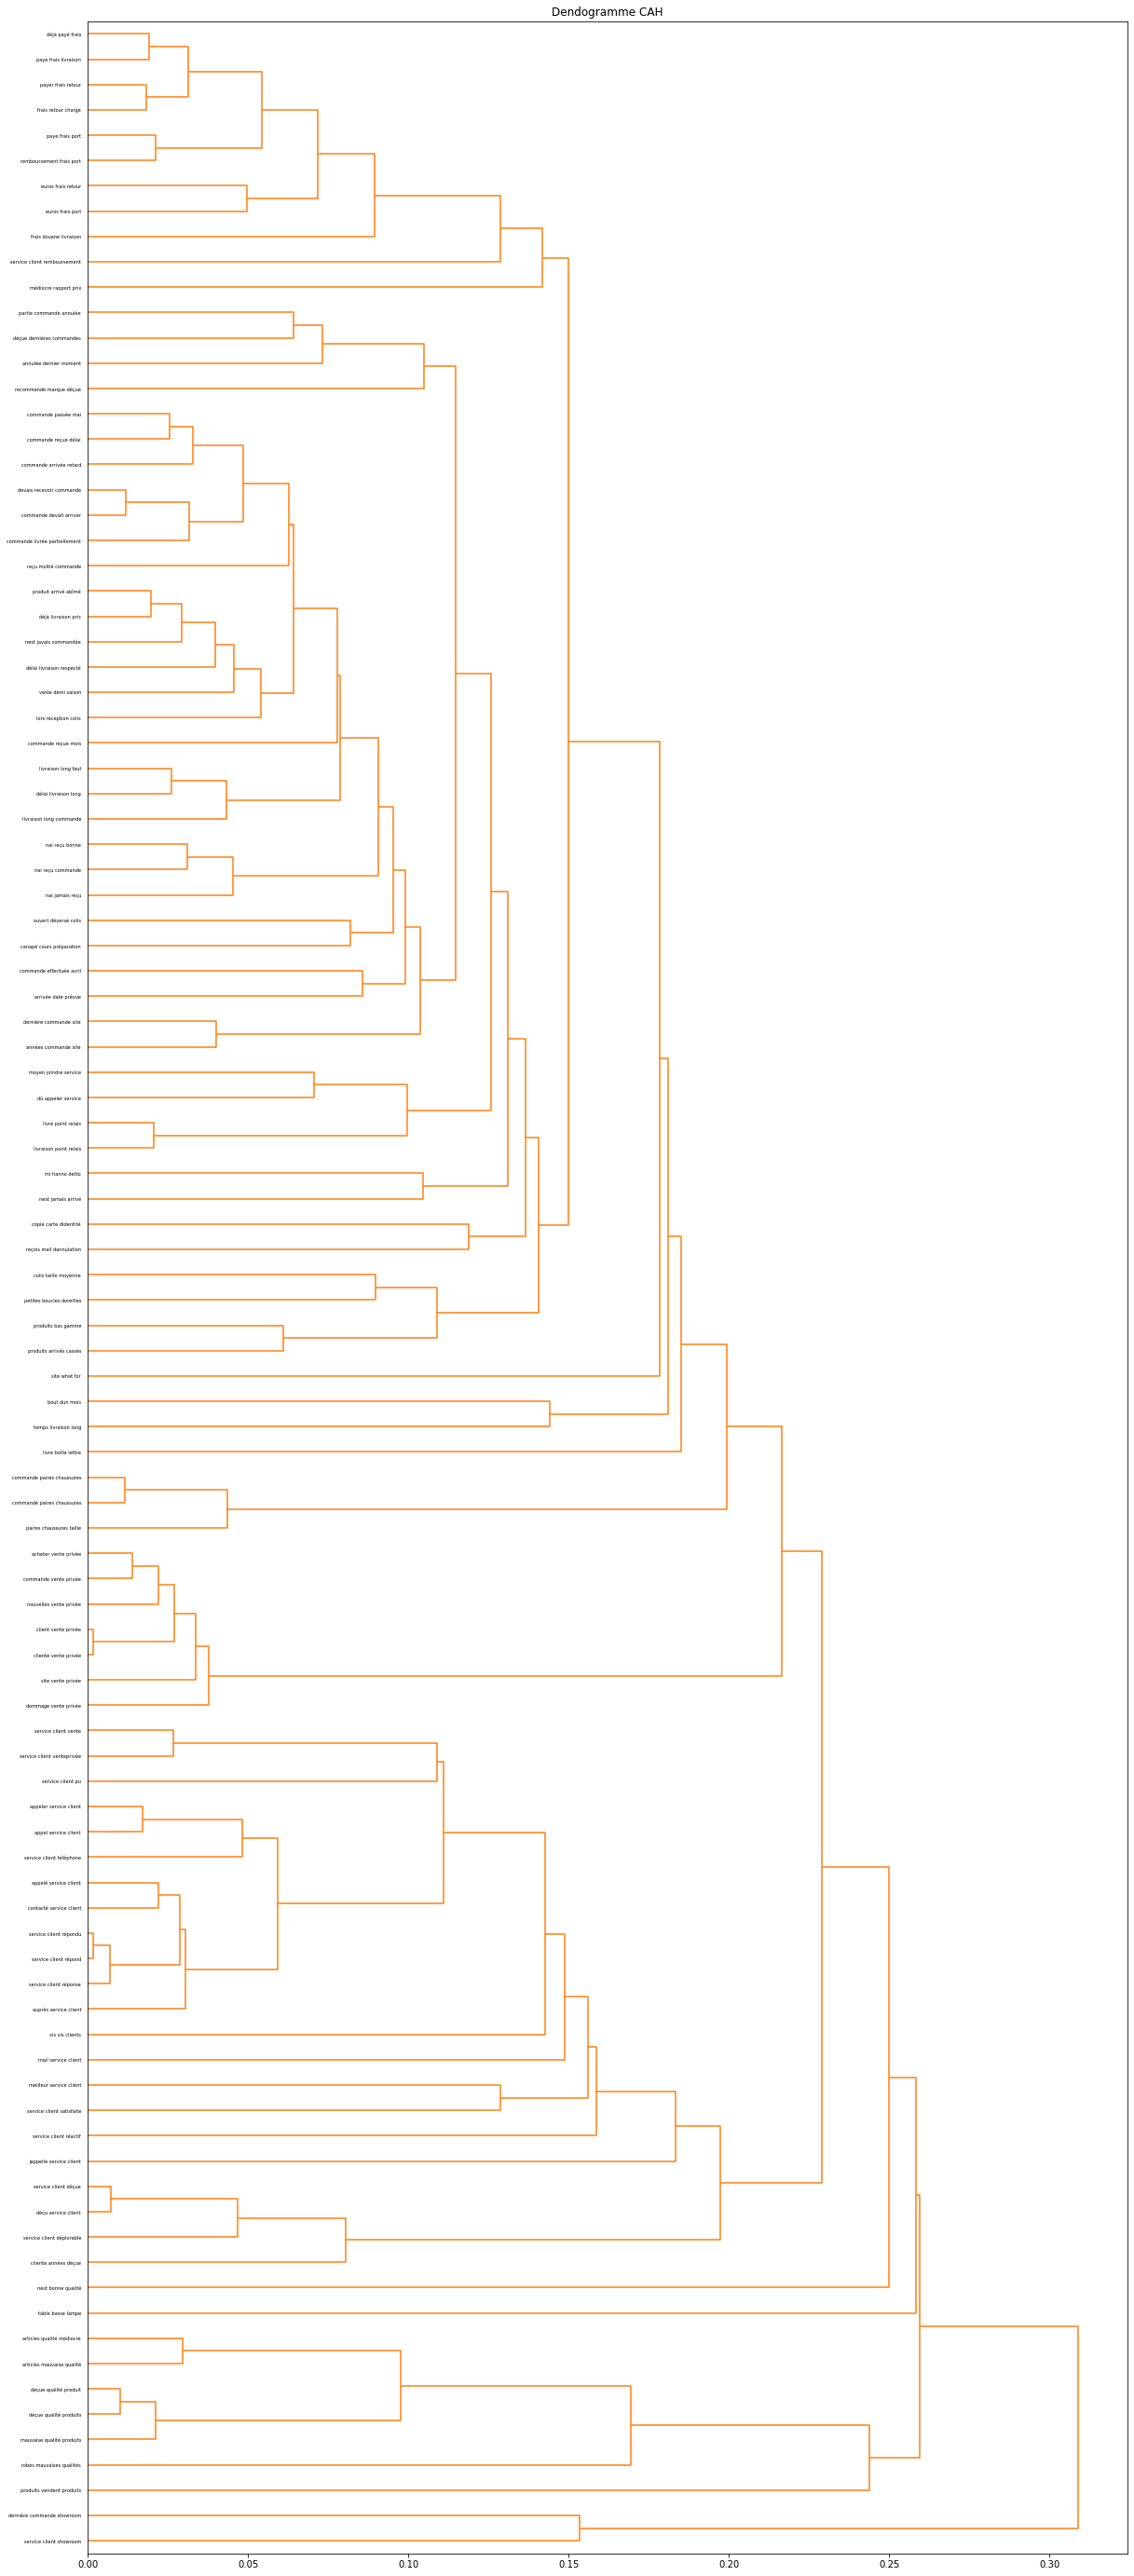

In [78]:
# 2 STAR - DENDOGRAMME
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np
import matplotlib.pyplot as plt
mots ='délai livraison long,contacté service client,site vente privée,mail service client,livraison point relais,appel service client,articles mauvaise qualité,années commande site,service client répond,service client réactif,nai jamais reçu,cliente vente privée,nai reçu commande,reçu moitié commande,appelé service client,commande vente privée,livré point relais,client vente privée,délai livraison respecté,commande arrivée retard,euros frais port,remboursement frais port,frais retour charge,service client showroom,euros frais retour,vis vis clients,dernière commande showroom,auprès service client,dernière commande site,commande devait arriver,payer frais retour,déçue dernières commandes,nest jamais arrivé,commande reçue délai,service client déplorable,commandé paires chaussures,commande paires chaussures,devais recevoir commande,jappelle service client,nai reçu bonne,temps livraison long,nest bonne qualité,partie commande annulée,commande passée mai,déçue qualité produits,déçu service client,arrivée date prévue,déjà livraison pris,service client remboursement,robes mauvaises qualités,articles qualité médiocre,produits arrivés cassés,reçois mail dannulation,veste demi saison,nouvelles vente privée,dû appeler service,petites boucles doreilles,produits vendent produits,nest javais commandée,annulée dernier moment,appeler service client,service client pu,paye frais livraison,paires chaussures taille,paye frais port,déçue qualité produit,cliente années déçue,service client répondu,produit arrivé abîmé,recommande marque déçue,commande livrée partiellement,produits bas gamme,frais douane livraison,service client venteprivée,service client vente,livre boîte lettre,service client téléphone,canapé cours préparation,déjà payé frais,commande effectuée avril,lors réception colis,médiocre rapport prix,livraison long faut,dommage vente privée,livraison long commande,service client satisfaite,mi hanno detto,site what for,service client réponse,copie carte didentité,acheter vente privée,bout dun mois,commande reçue mois,colis taille moyenne,ouvert déversé colis,service client déçue,table basse lampe,mauvaise qualité produits,meilleur service client,moyen joindre service' 
liste_mots=mots.split(',')
matrix=model.encode(liste_mots)
plt.figure(figsize=(20,50))

Z=linkage(matrix, method ='average', metric ='cosine')

plt.title ("Dendogramme CAH")
dendrogram(Z,labels=liste_mots,color_threshold=5,orientation='right')
plt.show()

In [24]:
# 3 STAR
df3c=df3b.sort_values(by = 'frequence', ascending = False).head(100)
corpus =df3c['Groupe_de_mots'].tolist()

model = SentenceTransformer('distilbert-multilingual-nli-stsb-quora-ranking')
corpus_embeddings = model.encode(corpus)

# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['service client showroom', 'service client showroomprivé', 'frais commanderai showroom', 'bijoux service client']

Cluster  2
['livraison point relais', 'livré point relais', 'point relais change', 'point relais colis', 'point relais demandé', 'colis point relais', 'auprès mondial relay', 'relais colis dorigine']

Cluster  3
['rapport qualité prix', 'déçue qualité vêtements', 'déçue qualité produits', 'marchandise bonne qualité', 'articles mauvaise qualité', 'produit qualité moyenne', 'vêtements fille ravie', 'déçu qualité produits', 'paire chaussures petite', 'paire chaussures déçue', 'acheté présente défaut', 'qualité laisse désirer', 'mauvaise qualité taille', 'mauvaise qualité recommanderais', 'trouve décevant pouvoir']

Cluster  4
['délai livraison long', 'manque articles commande', 'frais livraison élevés', 'reçu totalité commande', 'manque article commande', 'dois payer frais', 'temps livraison long', 'délai dinstance jours', 'manque article colis', 'manquait article

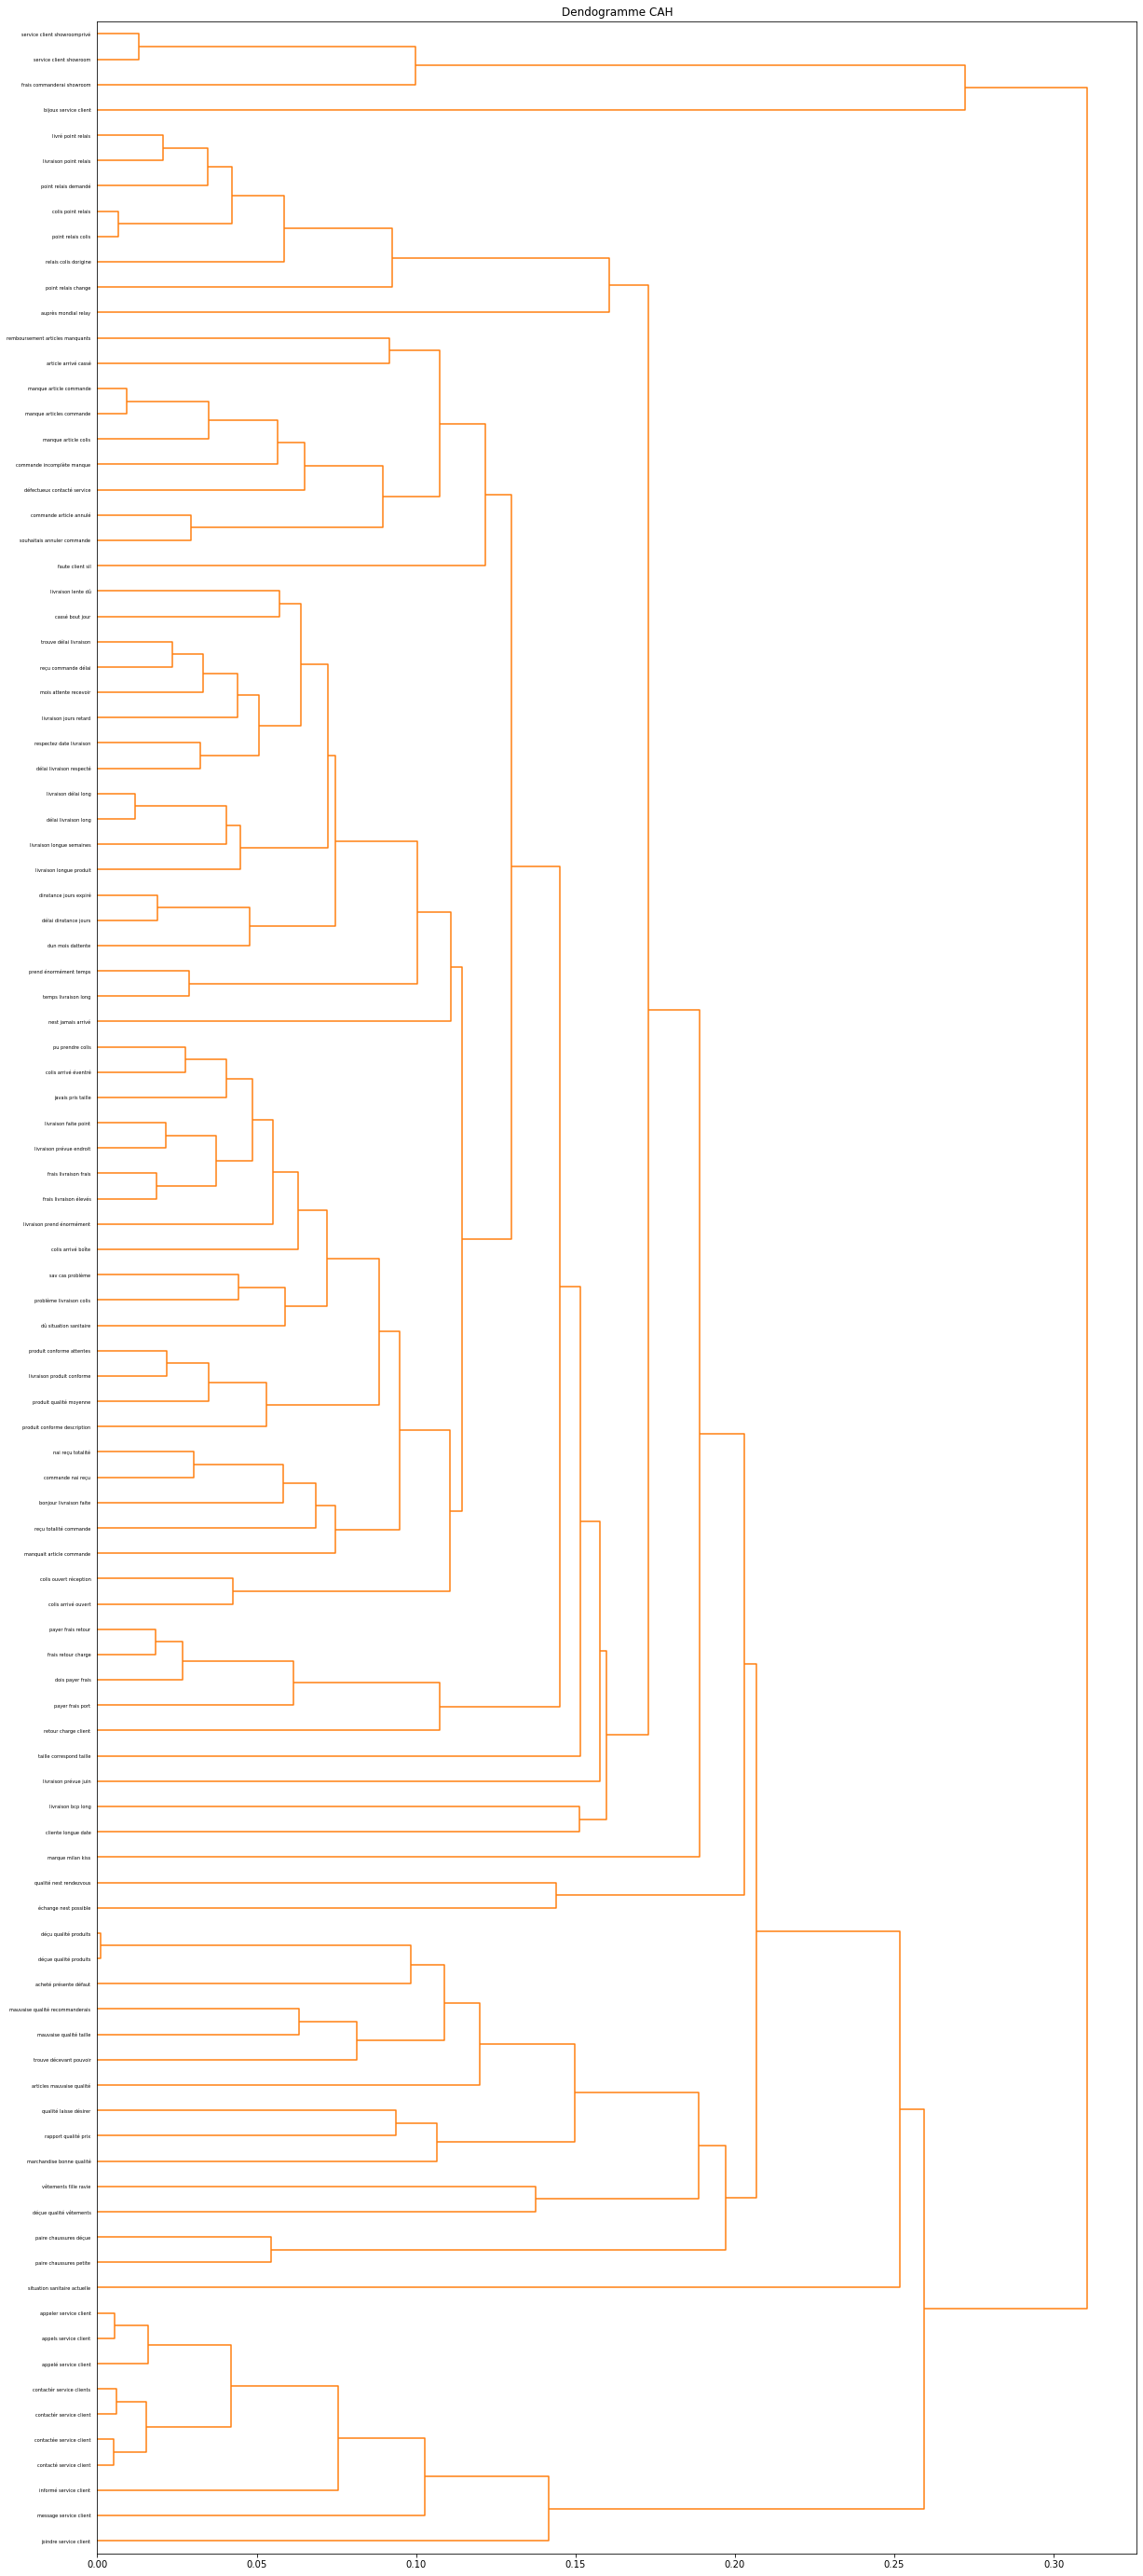

In [81]:
# 3 STAR - DENDOGRAMME
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np
import matplotlib.pyplot as plt
mots ='délai livraison long,manque articles commande,frais livraison élevés,livraison point relais,rapport qualité prix,reçu totalité commande,appelé service client,manque article commande,contactér service client,dois payer frais,temps livraison long,délai dinstance jours,manque article colis,manquait article commande,appels service client,service client showroom,commande nai reçu,dinstance jours expiré,joindre service client,livraison longue produit,frais retour charge,déçue qualité vêtements,taille correspond taille,cliente longue date,déçue qualité produits,délai livraison respecté,marchandise bonne qualité,service client showroomprivé,livré point relais,colis arrivé boîte,livraison bcp long,cassé bout jour,livraison prévue juin,livraison prévue endroit,livraison produit conforme,message service client,livraison prend énormément,point relais change,point relais colis,frais commanderai showroom,point relais demandé,articles mauvaise qualité,produit qualité moyenne,dû situation sanitaire,colis arrivé éventré,vêtements fille ravie,déçu qualité produits,problème livraison colis,frais livraison frais,colis arrivé ouvert,nai reçu totalité,livraison longue semaines,prend énormément temps,payer frais retour,commande incomplète manque,informé service client,échange nest possible,contacté service client,paire chaussures petite,défectueux contacté service,qualité nest rendezvous,contactée service client,paire chaussures déçue,javais pris taille,colis ouvert réception,article arrivé cassé,acheté présente défaut,payer frais port,contactér service clients,bonjour livraison faite,respectez date livraison,marque milan kiss,mois attente recevoir,retour charge client,qualité laisse désirer,faute client sil,appeler service client,souhaitais annuler commande,remboursement articles manquants,reçu commande délai,nest jamais arrivé,produit conforme attentes,mauvaise qualité taille,livraison lente dû,dun mois dattente,mauvaise qualité recommanderais,commande article annulé,livraison jours retard,produit conforme description,trouve décevant pouvoir,pu prendre colis,trouve délai livraison,colis point relais,sav cas problème,auprès mondial relay,livraison délai long,relais colis dorigine,situation sanitaire actuelle,livraison faite point,bijoux service client' 
liste_mots=mots.split(',')
matrix=model.encode(liste_mots)
plt.figure(figsize=(20,50))

Z=linkage(matrix, method ='average', metric ='cosine')

plt.title ("Dendogramme CAH")
dendrogram(Z,labels=liste_mots,color_threshold=5,orientation='right')
plt.show()

In [82]:
# 4 STAR
df4c=df4b.sort_values(by = 'frequence', ascending = False).head(100)
corpus =df4c[].tolist()

model = SentenceTransformer('distilbert-multilingual-nli-stsb-quora-ranking')
corpus_embeddings = model.encode(corpus)

# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['livraison rapide produit', 'rapide produit conforme', 'commande reçue rapidement', 'livraison rapide commande', 'livraison rapide prévue', 'livraison rapide satisfaite', 'livraison rapide produits', 'livraison rapide prévu', 'colis arrivé ouvert', 'livraison tres rapide', 'livraison ultra rapide', 'rapide produit qualité', 'livraison super rapide', 'livraison rapide article', 'produit livraison rapide', 'conforme livraison rapide', 'livraison rapide revanche']

Cluster  2
['service client top', 'service client réactif', 'contacté service client', 'contactér service client', 'contact service client', 'service client contacté', 'réponse service client']

Cluster  3
['rapport qualité prix', 'articles bonne qualité', 'produit bonne qualité', 'produits bonne qualité', 'article bonne qualité', 'déçue qualité produit', 'déçue qualité articles', 'seul point négatif', 'produit belle qualité', 'semble bonne qualité', 'reçu bonne taille', 'excellent rapport qualité', 'marchandise bon

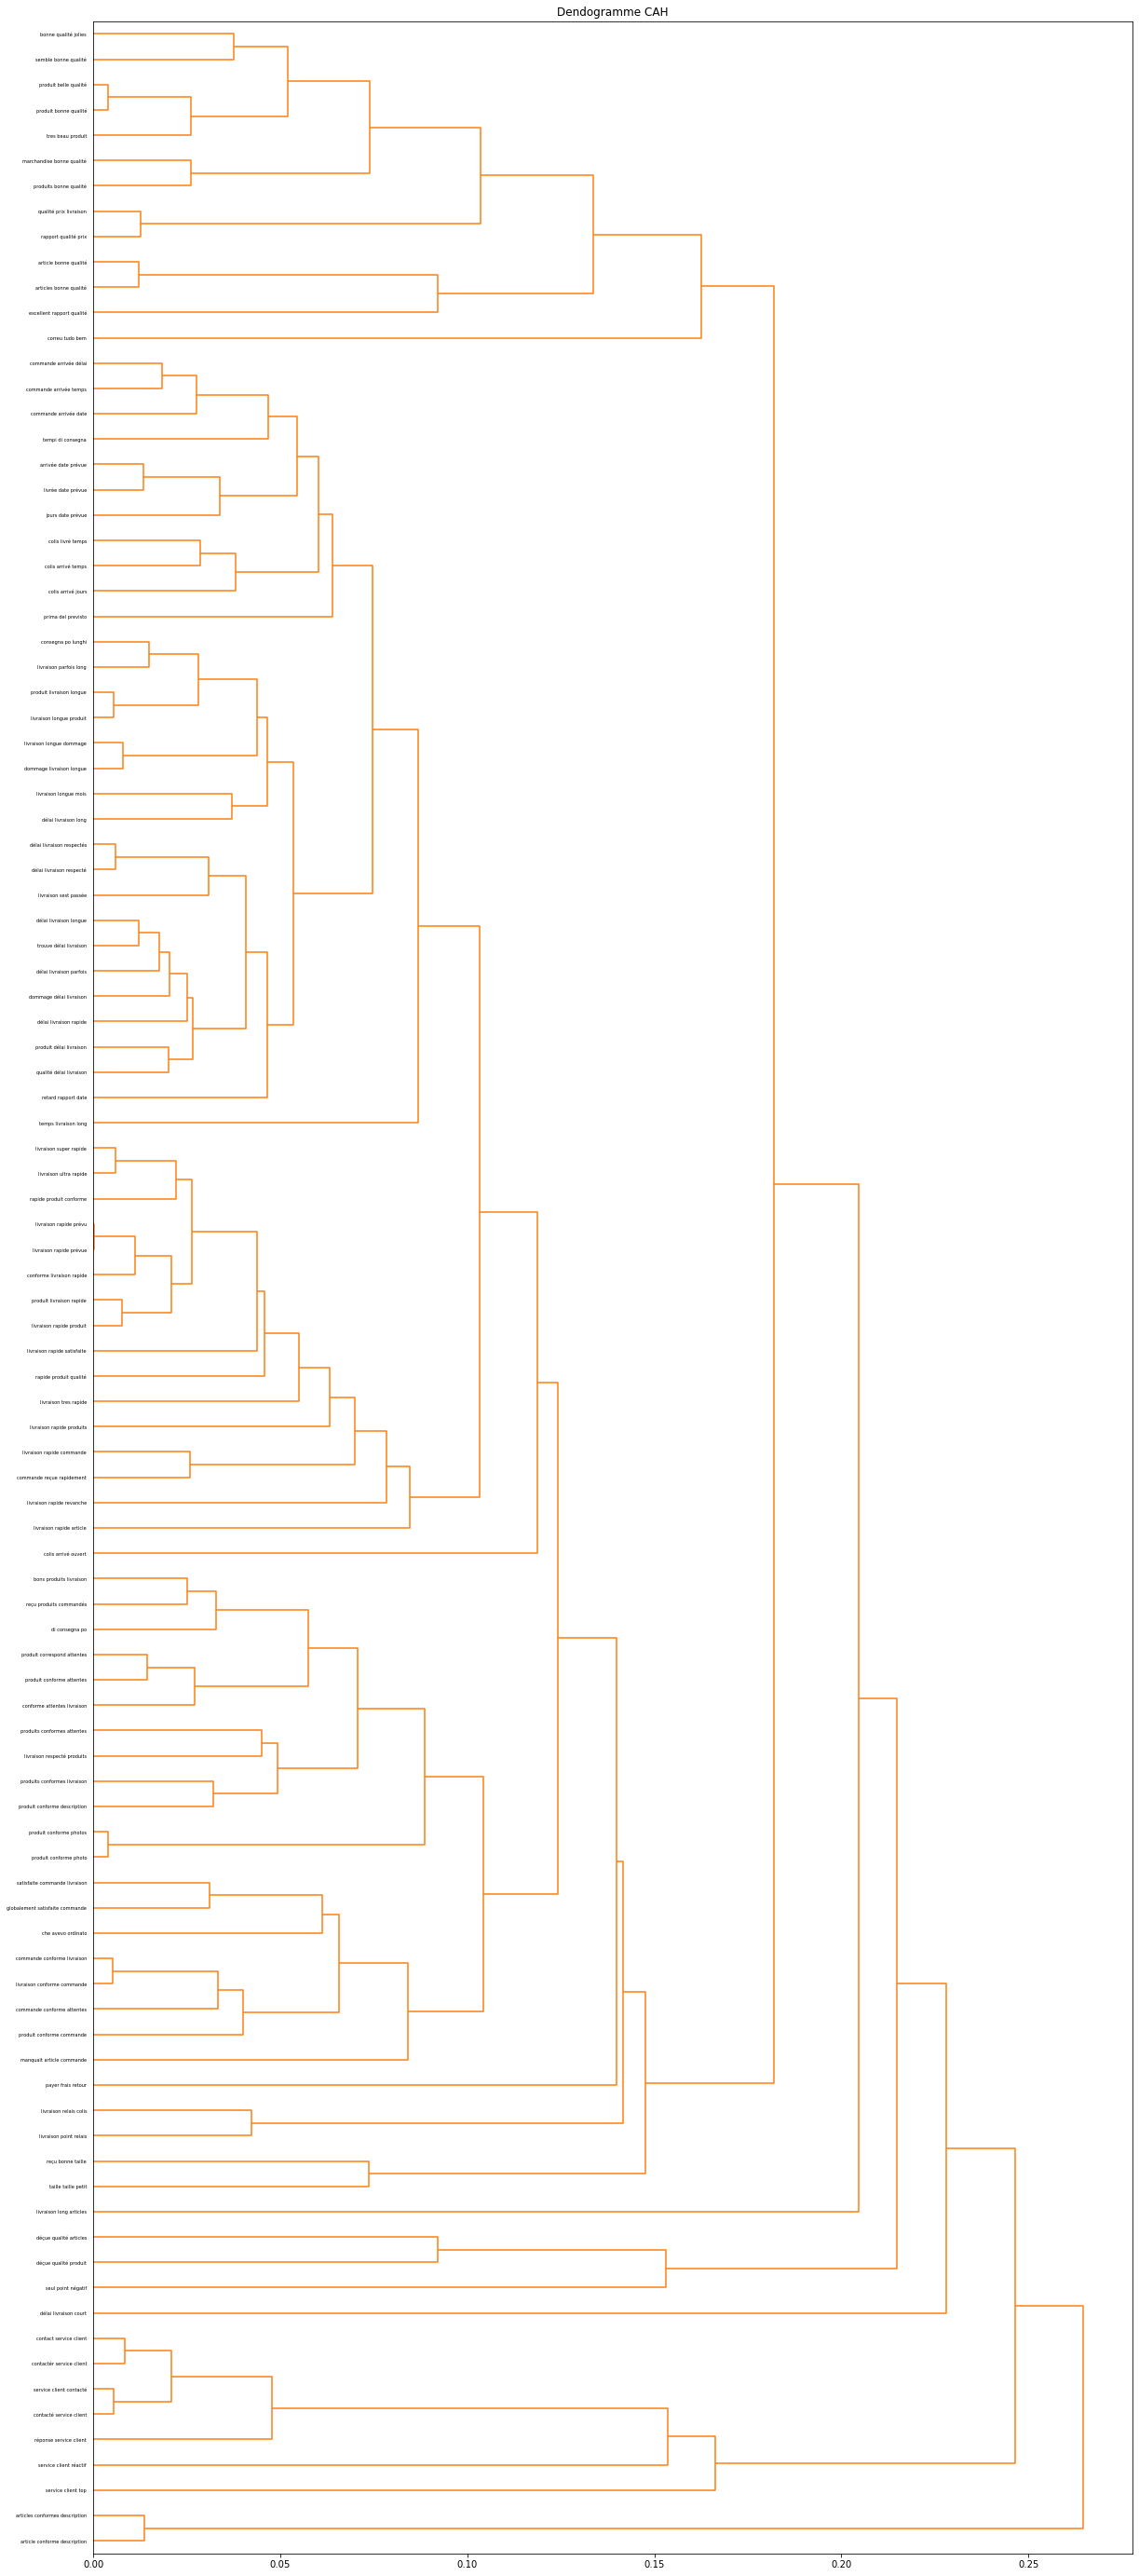

In [84]:
# 4 STAR - DENDOGRAMME
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np
import matplotlib.pyplot as plt
mots ='délai livraison long,rapport qualité prix,délai livraison respecté,articles bonne qualité,livraison rapide produit,service client top,livraison point relais,produit conforme description,produit bonne qualité,service client réactif,livraison longue produit,produit conforme attentes,délai livraison respectés,contacté service client,livraison parfois long,qualité délai livraison,trouve délai livraison,temps livraison long,délai livraison parfois,produits bonne qualité,livraison respecté produits,rapide produit conforme,livraison conforme commande,commande reçue rapidement,tempi di consegna,dommage délai livraison,produit conforme commande,article bonne qualité,article conforme description,payer frais retour,délai livraison rapide,manquait article commande,dommage livraison longue,déçue qualité produit,livraison rapide commande,délai livraison longue,produit livraison longue,déçue qualité articles,livraison rapide prévue,di consegna po,livrée date prévue,livraison rapide satisfaite,seul point négatif,prima del previsto,commande arrivée temps,produits conformes livraison,produits conformes attentes,contactér service client,livraison rapide produits,reçu produits commandés,contact service client,articles conformes description,consegna po lunghi,livraison rapide prévu,colis arrivé ouvert,livraison longue mois,produit conforme photo,produit conforme photos,colis arrivé jours,produit belle qualité,livraison tres rapide,livraison ultra rapide,colis arrivé temps,globalement satisfaite commande,semble bonne qualité,rapide produit qualité,taille taille petit,service client contacté,reçu bonne taille,livraison super rapide,che avevo ordinato,produit correspond attentes,conforme attentes livraison,commande conforme livraison,commande conforme attentes,réponse service client,bons produits livraison,commande arrivée délai,commande arrivée date,arrivée date prévue,excellent rapport qualité,livraison long articles,marchandise bonne qualité,bonne qualité jolies,livraison longue dommage,correu tudo bem,délai livraison court,tres beau produit,satisfaite commande livraison,livraison rapide article,qualité prix livraison,colis livré temps,produit livraison rapide,conforme livraison rapide,livraison rapide revanche,retard rapport date,livraison relais colis,livraison sest passée,jours date prévue,produit délai livraison' 
liste_mots=mots.split(',')
matrix=model.encode(liste_mots)
plt.figure(figsize=(20,50))

Z=linkage(matrix, method ='average', metric ='cosine')

plt.title ("Dendogramme CAH")
dendrogram(Z,labels=liste_mots,color_threshold=5,orientation='right')
plt.show()

In [26]:
# 5 STAR
df5c=df5b.sort_values(by = 'frequence', ascending = False).head(100)
corpus =df5c['Groupe_de_mots'].tolist()

model = SentenceTransformer('distilbert-multilingual-nli-stsb-quora-ranking')
corpus_embeddings = model.encode(corpus)

# Perform kmean clustering
num_clusters = 10
clustering_model = KMeans(n_clusters=num_clusters, init="k-means++")
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['livré date prévue', 'arrivé date prévue', 'livraison date prévue', 'reçu date prévue', 'arrivée date prévue', 'commande arrivée date', 'jours date prévue', 'date livraison respectée', 'date prévue produit', 'date prévue parfait', 'livraison tôt prévue', 'conforme attentes délai', 'reçu tôt prévu', 'livré tôt prévu', 'colis reçu date']

Cluster  2
['produit conforme photo', 'article conforme photo', 'photo livraison rapide']

Cluster  3
['livraison rapide produit', 'livraison rapide prévue', 'rapide produit conforme', 'livraison ultra rapide', 'livraison rapide produits', 'qualité livraison rapide', 'produit livraison rapide', 'livraison super rapide', 'livraison rapide articles', 'parfait livraison rapide', 'livraison rapide article', 'commande reçue rapidement', 'description livraison rapide', 'achat livraison rapide', 'prix livraison rapide', 'livraison rapide commande', 'livraison rapide prévu', 'livraison rapide soignée', 'rapide produits conformes', 'commande livraiso

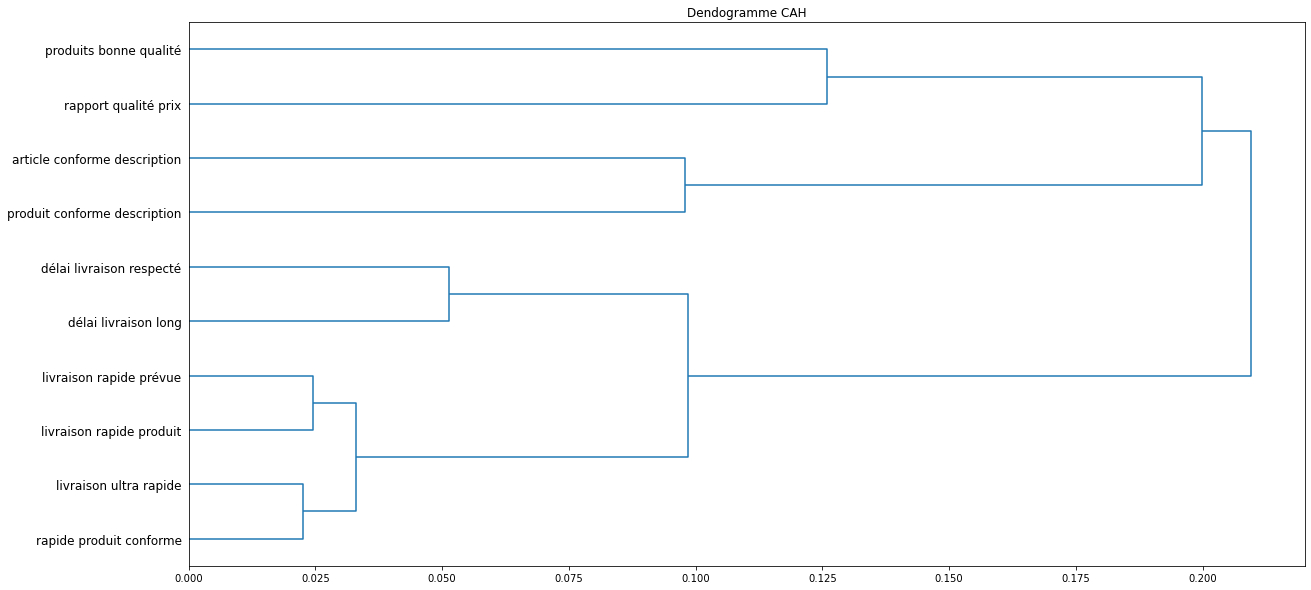

In [85]:
# 5 STAR - DENDOGRAMME
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np
import matplotlib.pyplot as plt
mots ='rapport qualité prix,livraison rapide produit,délai livraison long,délai livraison respecté,produits bonne qualité,produit conforme description,livraison rapide prévue,rapide produit conforme,livraison ultra rapide,article conforme description' 
liste_mots=mots.split(',')
matrix=model.encode(liste_mots)
plt.figure(figsize=(20,10))

Z=linkage(matrix, method ='average', metric ='cosine')

plt.title ("Dendogramme CAH")
dendrogram(Z,labels=liste_mots,color_threshold=0,orientation='right')
plt.show()

In [ ]:
# Perform kmean clustering
num_clusters = 10
clustering_model = KMeans(n_clusters=num_clusters, init="k-means++")
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")
